In [44]:
import networkx as nx
from glob import glob
import re
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd; pd.options.display.float_format = '{:,.2f}'.format
import statsmodels.stats.api as sm
import warnings; warnings.filterwarnings("ignore", category=UserWarning)
from statistics import median_low

In [2]:
import sys
import os

sys.path.extend(['./..'])  # have to add the project path manually to the Python path
os.chdir('./..')

In [3]:
pwd

'/home/ssikdar/infinity-mirror'

In [4]:
from src.utils import load_pickle
from src.Tree import TreeNode

In [5]:
%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = [15, 10]

In [7]:
def plot_graph(g, ax=None, prog: str='neato', title=None, sel=None, pos=None):
#     pos = nx.spring_layout(g)
    pos = nx.nx_agraph.graphviz_layout(g, prog=prog)
    if sel == 'best':
        node_color = 'blue'
    elif sel == 'median':
        node_color = 'green'
    elif sel == 'worst':
        node_color = 'red'
    elif sel == 'fast':
        node_color = 'orange'
    else:
        node_color = 'black'
        
    nx.draw_networkx_nodes(g, ax=ax, pos=pos, alpha=0.5, node_size=20, node_color=node_color)
    nx.draw_networkx_edges(g, ax=ax, pos=pos, alpha=0.15)
    
    if title is None:
        title = g.name
    plt.title(title)
    plt.style.use('seaborn-white')
    plt.grid(False)

In [8]:
def grid_plot(graphs, selections, model, graph_name):
#     rows, cols = 3, n
    rows, cols = 3, n+1 
    plt.rcParams['figure.figsize'] = [20, 10]
    
    grid = gridspec.GridSpec(rows, cols);
    fig = plt.figure();

    for i, box in enumerate(grid):
        ax = fig.add_subplot(box)
        sel = selections[i]
        g = graphs[i]
        plot_graph(g, ax=ax, sel=sel, title=f'{sel[0]}_{i % (n + 1)}_{g.order(), g.size()}')
    plt.tight_layout()
    plt.suptitle(f'{model} {graph_name}', y=1);

reading pickle ./output/pickles/grid-10-10/SBM/fast_20_11.pkl.gz
reading pickle ./output/pickles/grid-10-10/SBM/fast_20_12.pkl.gz
reading pickle ./output/pickles/grid-10-10/SBM/fast_20_13.pkl.gz


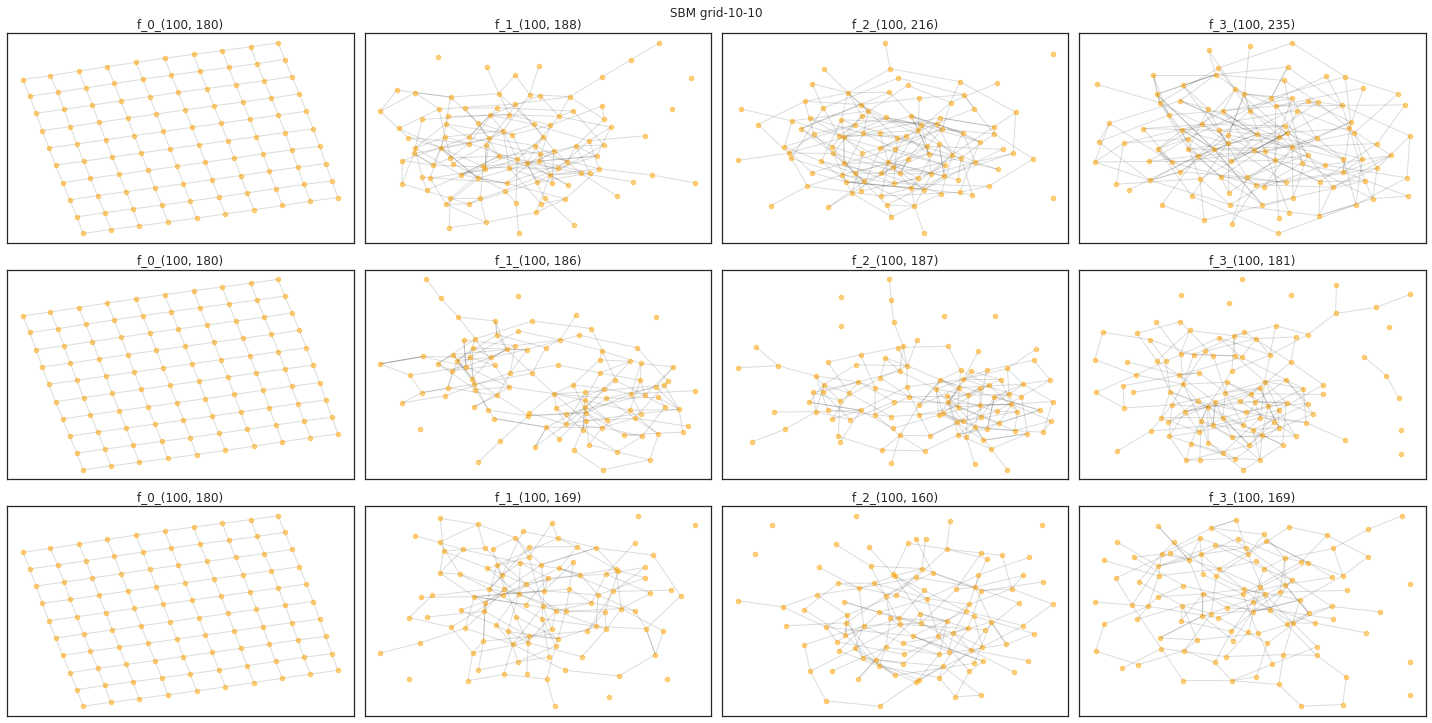

In [10]:
base_filename = './output/pickles'
# name = 'BA-100-3'
name = 'grid-10-10'
model = 'SBM'
# model = 'SBM'
trial_id = 40
N = 20
n = 3

# selections = ['best']*n + ['median']*n + ['worst']*n
selections = ['fast']*(3 * (n+1))
graphs = []
prog = 'neato'

filenames = []


# for sel in 'best', 'median', 'worst':
for trial_id in (11, 12, 13):
    for sel in ('fast',):
        path = f'{base_filename}/{name}/{model}/'
        pattern = fr"{sel}\_{N}\_{trial_id}(\_\S+)?(\.pkl.gz)"
        for file in os.listdir(path):
            if re.fullmatch(pattern, file) is nobbt None:
                pickle_path = f'{path}{file}'
                break
        print('reading pickle', pickle_path)
        root = load_pickle(pickle_path)
        root_graphs = [root.graph]
        root_graphs.extend([tnode.graph for tnode in root.descendants[: n]])
        graphs.extend(root_graphs)

grid_plot(graphs=graphs, selections=selections, model=model, graph_name=name)

In [37]:
tnodes[1][0]

TreeNode('/root/fast_1', graph=<networkx.classes.graph.Graph object at 0x7f28c634ca90>, stats={'deltacon0': 784.252, 'lambda_dist': 0.138, 'pagerank_cvm': 0.067, 'node_diff': 1.0, 'edge_diff': 1.0, 'pgd_pearson': 3.861425265760943e-06, 'pgd_spearman': 0.08181518418367162, 'degree_cvm': 0.167})

In [41]:
def grid_plot_v2(tnodes, model, graph_name):
    rows, cols = 10, 5 
    plt.rcParams['figure.figsize'] = [20, 30]
    
    grid = gridspec.GridSpec(rows, cols);
    fig = plt.figure();

    for i, box in enumerate(grid):
        ax = fig.add_subplot(box)
        sel = 'fast'
        g = tnodes[i].graph
        s = str(tnodes[i].stats['deltacon0'])
        plot_graph(g, ax=ax, sel=sel, title=f'{sel[0]} {i+1} {g.order(), g.size()}')
        plt.text(s=s, x=0, y=0)
    plt.tight_layout()
    plt.suptitle(f'{model} {graph_name}', y=1);

In [42]:
base_filename = './output/pickles'
# name = 'BA-100-3'
name = 'grid-10-10'
model = 'CNRG'
# model = 'SBM'
N = 20

selections = ['fast']*50 #(3 * (n+1))
tnodes = {1: [], 5: [], 10: [], 20: []}
prog = 'neato'
filenames = []

for gen in (1, 5, 10, 20):
    for trial_id in range(1, 51):
        for sel in ('fast',):
            path = f'{base_filename}/{name}/{model}/'
            pattern = fr"{sel}\_{N}\_{trial_id}(\_\S+)?(\.pkl.gz)"
            for file in os.listdir(path):
                if re.fullmatch(pattern, file) is not None:
                    pickle_path = f'{path}{file}'
                    break
            print('reading pickle', pickle_path, end=' ', flush=True)
            root = load_pickle(pickle_path)
            if gen == 0:
                tnode = root
            else:
                tnode = root.descendants[gen - 1]
            tnodes[gen].append(tnode)

reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_1.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_2.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_3.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_4.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_5.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_6.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_7.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_8.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_9.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_10.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_11.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_12.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_13.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_14.pkl.gz reading pickle ./output/pickles/grid-10-10/CNRG/fast_20_15.pkl.gz reading pickle ./ou

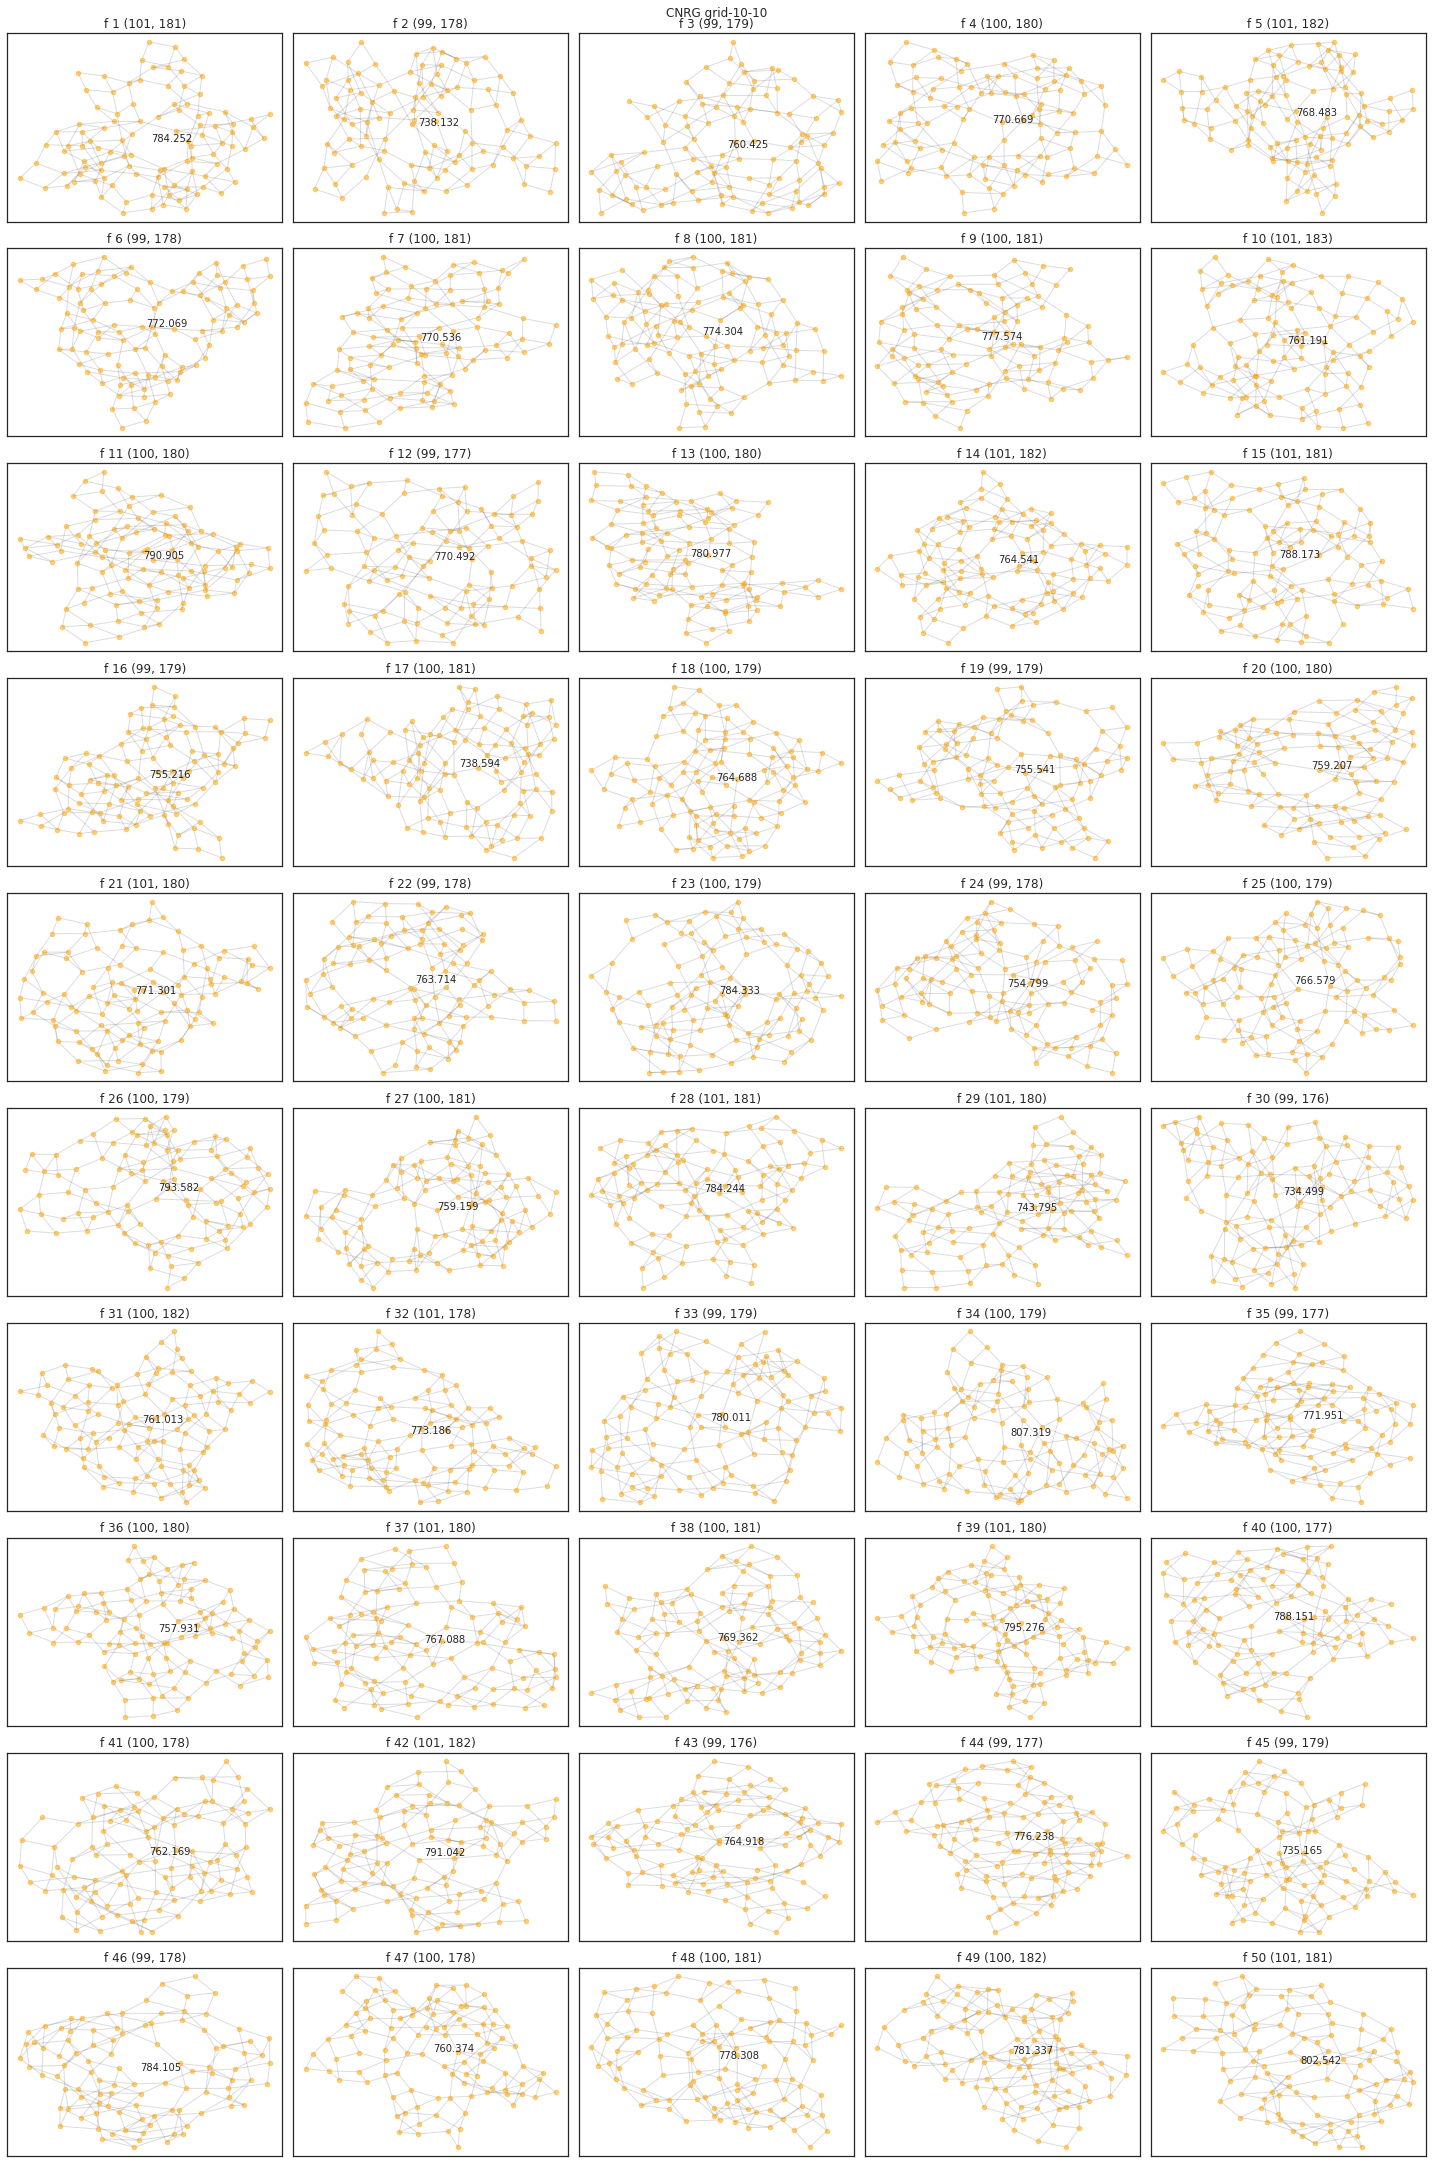

In [43]:
grid_plot_v2(tnodes[1], model, name)

In [61]:
sorted_tnodes_20 = sorted(tnodes[20], key=lambda x: x.stats['deltacon0'])

In [62]:
sorted_tnodes_20[0], sorted_tnodes_20[-1]

(TreeNode('/root/fast_1/fast_2/fast_3/fast_4/fast_5/fast_6/fast_7/fast_8/fast_9/fast_10/fast_11/fast_12/fast_13/fast_14/fast_15/fast_16/fast_17/fast_18/fast_19/fast_20', graph=<networkx.classes.graph.Graph object at 0x7f28a3360f90>, stats={'deltacon0': 649.262, 'lambda_dist': 0.309, 'pagerank_cvm': 0.165, 'node_diff': 6.0, 'edge_diff': 27.0, 'pgd_pearson': inf, 'pgd_spearman': inf, 'degree_cvm': 0.167}),
 TreeNode('/root/fast_1/fast_2/fast_3/fast_4/fast_5/fast_6/fast_7/fast_8/fast_9/fast_10/fast_11/fast_12/fast_13/fast_14/fast_15/fast_16/fast_17/fast_18/fast_19/fast_20', graph=<networkx.classes.graph.Graph object at 0x7f28a3386bd0>, stats={'deltacon0': 778.431, 'lambda_dist': 0.163, 'pagerank_cvm': 0.29, 'node_diff': 8.0, 'edge_diff': 9.0, 'pgd_pearson': inf, 'pgd_spearman': inf, 'degree_cvm': 0.167}))

In [63]:
nx.write_gml(sorted_tnodes_20[24].graph, './output/grid-10-10/CNRG_20_median.gml')

tnodes

## Aggregate all the stats make the plot

1. Reading info from pickles

In [ ]:
def get_stats_from_root(name, model, sel, root, cols, trial_id):
    
    for tnode in root.descendants:
        row = {}
        row['name'] = name
        
        row['orig_n'] = root.graph.order()
        row['orig_m'] = root.graph.size()
        row['orig_graph_obj'] = root.graph
        
        row['model'] = model
        row['sel'] = sel
        row['trial_id'] = trial_id
        
        row['gen_id'] = tnode.depth
        row['gen_n'] = tnode.graph.order()
        row['gen_m'] = tnode.graph.size()
        row['gen_graph_obj'] = tnode.graph
        
        stats = tnode.stats
        assert set(cols[-8: ]) == set(stats.keys()), f'tnode: {stats.keys()} doesnt have all the reqd stats'
        for key, val in stats.items():
            row[key] = val
        
        assert len(row.keys()) == len(cols), \
        f'Imporper number of cols in row: {len(row)}: expected {len(cols)} {stats.keys()}'
        
        yield row
    

In [ ]:
def analyze_failures(name, model, sel):
    """
    Analyze the failed pickles
    """
    base_filename = './output/pickles'
    fail_counts = 0
    N = 20
    n = 0
    for file in glob(f'{base_filename}/{name}/{model}/{sel}*'):
        n += 1
        if 'failed' in file:
            fail_counts += 1
            good_id = int(file[file.rfind('-')+1: file.find('.pkl.gz')])
            print(good_id, end=' ', flush=True)
    print()
    print('{} / {} fails'.format(fail_counts, n))

In [ ]:
analyze_failures(name='BA-100-3', model='NetGAN', sel='fast')

In [ ]:
base_filename = './output/pickles'
# name = 'grid-10-10'
name = 'grid-10-10'

N = 20  # number of total time steps
T = 50  # number of trials

cols = ['name', 'orig_n', 'orig_m', 'orig_graph_obj', 
        'model', 'sel', 'trial_id',
        'gen_id', 'gen_n', 'gen_m', 'gen_graph_obj',
        'deltacon0', 'lambda_dist', 'degree_cvm', 'pagerank_cvm', 
        'pgd_pearson', 'pgd_spearman', 'node_diff', 'edge_diff']

data = {col: [] for col in cols}

fail_count = 0

for model in 'CNRG', 'SBM', 'Chung-Lu', 'BTER', 'Erdos-Renyi', 'GraphAE', 'GraphVAE':
#     for sel in 'best', 'median', 'worst', 'fast':
    for sel in 'fast',:
        for trial_id in range(1, T+1):
            path_re = f'{base_filename}/{name}/{model}/{sel}_{N}_{trial_id}.pkl.gz'
            try:
                root_pickle_path = glob(path_re)[0]
            except IndexError:
                print(f'skipping {model}')
                continue
            print('reading ', '/'.join(root_pickle_path.split('/')[-2:]), end=' ', flush=True)

            if 'failed' in root_pickle_path:
                print(f'Infinity mirror failed for {root_pickle_path}! Skipping')
                fail_count += 1
                continue

            root = load_pickle(root_pickle_path)
            for row in get_stats_from_root(name=name, model=model, sel=sel, root=root, 
                                        cols=cols, trial_id=trial_id):
                for col, val in row.items():
                    data[col].append(val)

df = pd.DataFrame(data)

In [ ]:
def group_plot(df):
    name = df.name.unique()[0]
    metrics = ['node_diff', 'edge_diff', 'lambda_dist', 'deltacon0', 'degree_cvm']#, 'pgd_spearman']
    rows = len(metrics)
    
    models = df.model.unique() # ['CNRG', 'SBM', 'Chung-Lu', 'BTER']
    cols = len(models)

    n_d_min = min(df[df.model==model].node_diff.min() for model in models) - 1
    n_d_max = max(df[df.model==model].node_diff.max() for model in models) + 5
    
    e_d_min = min(df[df.model==model].edge_diff.min() for model in models) - 1
    e_d_max = max(df[df.model==model].edge_diff.max() for model in models) + 5
    
    l_d_min = min(df[df.model==model].lambda_dist.min() for model in models) - 0.1
    l_d_max = max(df[df.model==model].lambda_dist.max() for model in models) + 0.15
    
    dc0_min = min(df[df.model==model].deltacon0.min() for model in models) - 100
    dc0_max = max(df[df.model==model].deltacon0.max() for model in models) + 100
    
    p_sp_min = min(df[df.model==model].pgd_spearman.min() for model in models) - 0.1
    p_sp_max = max(df[df.model==model].pgd_spearman.max() for model in models) + 0.15
    
    d_min = min(df[df.model==model].degree_cvm.min() for model in models) - 0.1
    d_max = max(df[df.model==model].degree_cvm.max() for model in models) + 0.15

    plt.rcParams['figure.figsize'] = [15, 10]
    fig, axes = plt.subplots(nrows=rows, ncols=cols, sharex=True)

    for i in range(rows):
        for j in range(cols):
            ax = axes[i, j]
            metric = metrics[i]
            model = models[j]
            filtered_df = df[df.model==model]
            
            if i == 0 and j == 0:
                legend_style = 'brief'
            else:
                legend_style = ''
            
            sns.lineplot(x='gen_id', y=metric, ax=ax, data=filtered_df, 
                         hue='sel', marker='o', ci=99, err_style='band', legend=legend_style);
            
            if metric == 'node_diff':
                ax.set_ylim((n_d_min, n_d_max))
            elif metric == 'edge_diff':
                ax.set_ylim((e_d_min, e_d_max))
            elif metric == 'lambda_dist':
                ax.set_ylim((l_d_min, l_d_max))
            elif metric == 'deltacon0':
                ax.set_ylim((dc0_min, dc0_max))
            elif metric == 'pgd_spearman':
                ax.set_ylim((p_sp_min, p_sp_max))
            elif metric == 'degree_cvm':
                ax.set_ylim((d_min, d_max))
                
            if j == 0:
                ax.set_ylabel(metric)
            else:
                ax.set_ylabel('')
                
            if i == 0:
                ax.set_title(model)
            else:
                ax.set_title('')
                
            if i == rows - 1:
                ax.set_xlabel('gen_id')
            else:
                ax.set_xlabel('')
            
    plt.suptitle(f'{name}', y=1.01);
    plt.tight_layout()

In [ ]:
group_plot(df)

## pick the best representatives across trials

In [ ]:
df.head()

In [ ]:
# filter by model and sel
# group by gen_id pick representative 

In [ ]:
df.sel.unique()

In [ ]:
# nodes in a grid
N = 10
for i in range(N):
    for j in range(N):
        print('\\node[vertex] (v{0}{1}) at ({2}, {3}) {{}};'.format(i, j, i/2, j/2))
    print()

In [ ]:
# edges in the grid
for i in range(N):
    st = '\path[link]'
    for j in range(N):
        st += ' (v{}{}) '.format(j, i)
        if j != N - 1:
            st += '--'
        else:
            st += ';'
    print(st)